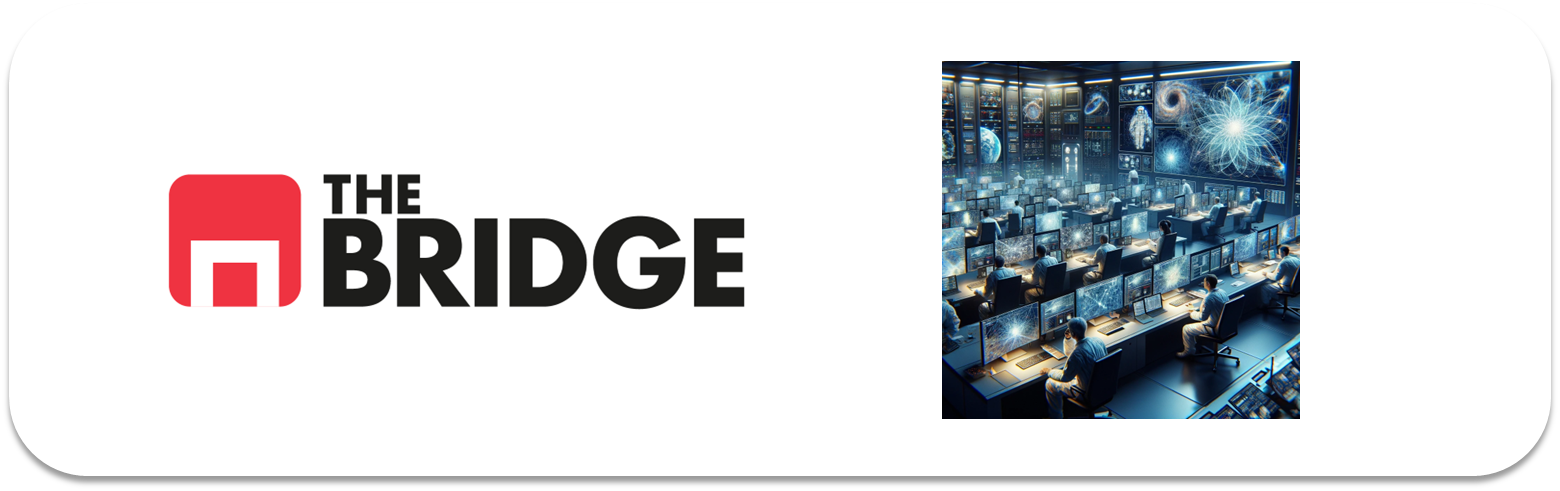

## PRACTICA OBLIGATORIA: **Transfer Learning y Fine Tuning**

* La práctica obligatoria de esta unidad consiste en un repetir el ejercicio de construcción de un modelo de clasificación de paisajes pero usando un modelo preentrenado. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
#import bootcampviztools as tds
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from keras.applications.mobilenet_v2 import MobileNetV2,decode_predictions

### Objetivo del ejercicio

Comparar una red convolucional hecha ad-hoc frente a los modelos preentrenados y ajustados con fine tuning y transfer learning. Para ello emplea el dataset de paisajes del conjunto de ejercicios de la unidad anterior.


### Se pide

1. Preparar los datos del modelo y las funciones de visualización, copia para ello todo lo que necesites de las soluciones del ejercicio de clasificación de paisajes de la unidad anterior.

2. Escoger entre uno de los modelos VGG-19, InceptionV3 y MobileNetV2 (todos en https://keras.io/api/applications/) (Se aconseja este último si no tenemos un ordenador muy potente). Si no te haces con estos puedes recurrir a la ResNetV50.

4. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

5. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

6. Comparar los resultados con los obtenidos con la red convolucional del ejercicio mencionado.

EXTRA:
- Repetir el transfer learning empleando aumentado de imágenes.



In [2]:

root_path = './data/'
train_path = os.path.join(root_path, "seg_train", "seg_train")  # Asegurar la ruta correcta
test_path = os.path.join(root_path, "seg_test", "seg_test")

def read_data(directorio, reshape_dim=(224, 224)):
    X = []
    y = []

    for folder in os.listdir(directorio):
        folder_path = os.path.join(directorio, folder)

        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                image_path = os.path.join(folder_path, file)

                if not os.path.isfile(image_path):
                    continue  # Saltar si no es un archivo

                if not file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                    print(f"Saltando archivo no válido: {file}")
                    continue

                print(f"Intentando leer: {image_path}")
                image = cv2.imread(image_path)

                if image is None:
                    print(f"Error al cargar la imagen: {image_path}")
                    continue

                image = cv2.resize(image, reshape_dim)

                X.append(image)
                y.append(folder)

    return np.array(X), np.array(y)

# Llamada a la función
X_train, y_train = read_data(train_path)
print(f"Imágenes cargadas: {len(X_train)}")


Intentando leer: ./data/seg_train\seg_train\buildings\0.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\10006.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\1001.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\10014.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\10018.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\10029.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\10032.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\10056.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\1009.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\10113.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\1012.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\10126.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\10144.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\10151.jpg
Intentando leer: ./data/seg_train\seg_train\buildings\10161.jpg
Intentando leer: ./data/seg_train\seg_train\bui

In [3]:
X_test, y_test = read_data(test_path)

Intentando leer: ./data/seg_test\seg_test\buildings\20057.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20060.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20061.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20064.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20073.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20074.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20078.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20083.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20094.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20096.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20113.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20131.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20140.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20177.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20186.jpg
Intentando leer: ./data/seg_test\seg_test\buildings\20206.jpg
Intentan

In [4]:
X_train.shape
num_classes = len(set(y_train))

In [5]:
from sklearn.preprocessing import LabelEncoder

# Crear y ajustar el LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Convertir clases a números
y_test = label_encoder.transform(y_test)  # Aplicar la misma conversión a test

# Crear un diccionario de mapeo {índice: clase}
class_mapping = dict(enumerate(label_encoder.classes_))

print("Clases codificadas:", class_mapping)  # Ver el mapeo de clases


Clases codificadas: {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}


In [6]:
print(type(y_test))
print(y_test[:1000])  # Mostrar algunos valores para ver el formato


<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 

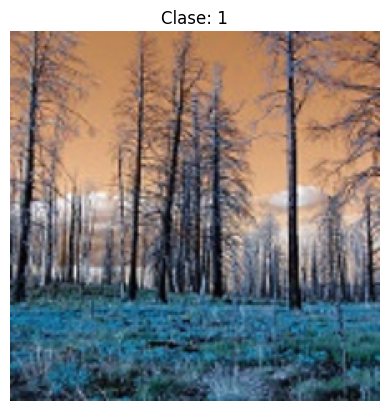

In [7]:

# Mostrar la primera imagen
plt.imshow(X_train[3300])  # X_train contiene imágenes en formato array
plt.title(f"Clase: {y_train[3300]}")
plt.axis("off")  # Ocultar ejes
plt.show()

In [8]:

base_model = MobileNetV2(input_shape=(224, 224, 3),
                   include_top=False,  # No incluir la parte de clasificación de ImageNet
                   weights="imagenet")  # Cargar pesos preentrenados


base_model.summary()


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [9]:
from tensorflow.keras import layers, models

# Crear la nueva cabeza con máximo 2 capas densas ocultas y una de salida
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation="relu")(x)  # Primera capa densa oculta
x = layers.Dense(64, activation="relu")(x)   # Segunda capa densa oculta
output = layers.Dense(num_classes, activation="softmax")(x)  # Capa de salida

# Definir el modelo completo
model = models.Model(inputs=base_model.input, outputs=output)

# Compilar el modelo
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Aumentar imágenes para mejorar generalización
datagen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    train_path,  # Ruta donde están las carpetas con imágenes
    target_size=(224, 224),  # Tamaño de imagen esperado por MobileNetV2
    batch_size=32,
    class_mode="sparse"  # Si las etiquetas son números
)


Found 14034 images belonging to 6 classes.


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1)


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)

c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 1178s 3s/step - accuracy: 0.7768 - loss: 0.6399 - val_accuracy: 0.3130 - val_loss: 8.4470
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 1129s 3s/step - accuracy: 0.8590 - loss: 0.4026 - val_accuracy: 0.4607 - val_loss: 3.6452
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 1120s 3s/step - accuracy: 0.8822 - loss: 0.3514 - val_accuracy: 0.2940 - val_loss: 8.1571
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 1120s 3s/step - accuracy: 0.8888 - loss: 0.3183 - val_accuracy: 0.4247 - val_loss: 5.7193
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 1123s 3s/step - accuracy: 0.8933 - loss: 0.3057 - val_accuracy: 0.4087 - val_loss: 4.9862
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


In [ ]:
# Predicciones
y_pred = np.argmax(model.predict(X_test), axis=1)


🔹 **Reporte de Clasificación:**

              precision    recall  f1-score   support

           0       0.35      0.90      0.50       437
           1       1.00      0.06      0.11       474
           2       0.64      0.29      0.40       553
           3       0.43      0.73      0.54       525
           4       0.57      0.43      0.49       510
           5       0.64      0.40      0.49       501

    accuracy                           0.46      3000
   macro avg       0.60      0.47      0.42      3000
weighted avg       0.61      0.46      0.42      3000



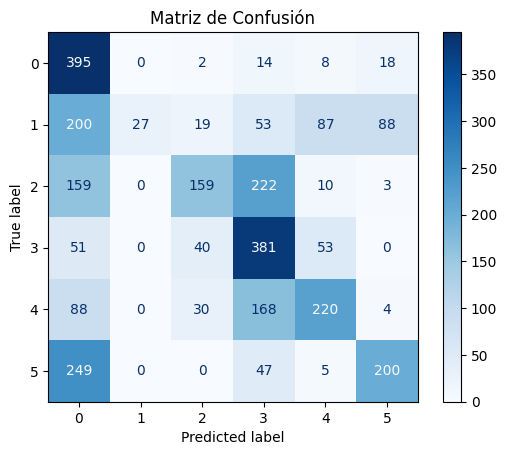

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Reporte de clasificación
print("\n🔹 **Reporte de Clasificación:**\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión correctamente
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap="Blues", values_format="d")

plt.title("Matriz de Confusión")
plt.show()


In [18]:
# Descongelar las últimas 20 capas para Fine-Tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compilar nuevamente con una tasa de aprendizaje baja (evita perder lo aprendido)
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Learning rate bajo para ajustar sin sobreescribir
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Continuar entrenamiento con Fine-Tuning
history_finetune = model.fit(
    train_generator,
    epochs=10,  # Fine-tuning se hace pocas épocas
    validation_data=(X_test, y_test),
    steps_per_epoch=100,
    validation_steps=50,
    callbacks=[early_stopping]
)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.8835 - loss: 0.3168 - val_accuracy: 0.5373 - val_loss: 2.8139
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 312s 3s/step - accuracy: 0.9090 - loss: 0.2833 - val_accuracy: 0.5987 - val_loss: 2.1712
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.9036 - loss: 0.3025 - val_accuracy: 0.6580 - val_loss: 1.7687
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.9107 - loss: 0.2572 - val_accuracy: 0.6950 - val_loss: 1.4666
Epoch 5/10
 39/100 ━━━━━━━━━━━━━━━━━━━━ 2:47 3s/step - accuracy: 0.9151 - loss: 0.2468

c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.9097 - loss: 0.2634 - val_accuracy: 0.7087 - val_loss: 1.3723
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 334s 3s/step - accuracy: 0.9142 - loss: 0.2440 - val_accuracy: 0.7443 - val_loss: 1.1451
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 359s 4s/step - accuracy: 0.9188 - loss: 0.2362 - val_accuracy: 0.7630 - val_loss: 1.0399
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9199 - loss: 0.2501 - val_accuracy: 0.7763 - val_loss: 0.9575
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.9289 - loss: 0.2241 - val_accuracy: 0.7793 - val_loss: 0.9124
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.9103 - loss: 0.2541 - val_accuracy: 0.7837 - val_loss: 0.8802
Restoring model weights from the end of the best epoch: 10.


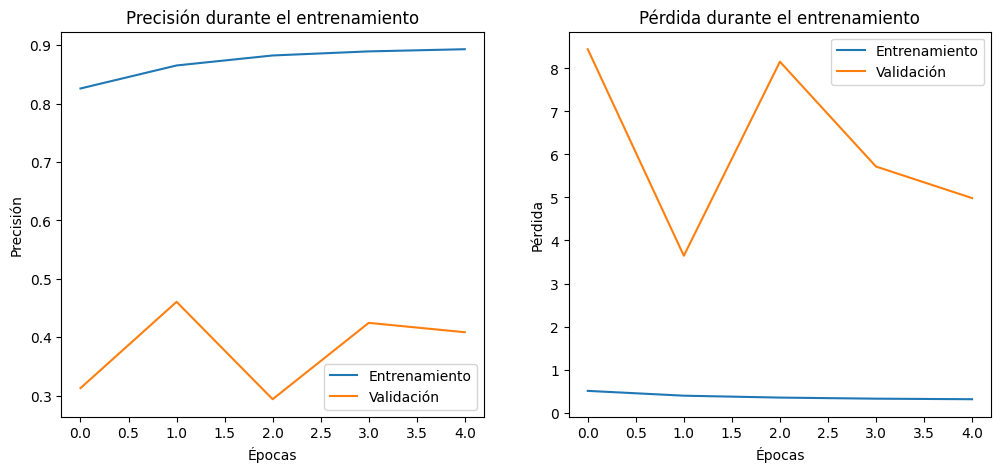

In [19]:

# Graficar la precisión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Entrenamiento")
plt.plot(history.history["val_accuracy"], label="Validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.title("Precisión durante el entrenamiento")

# Graficar la pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Entrenamiento")
plt.plot(history.history["val_loss"], label="Validación")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.title("Pérdida durante el entrenamiento")

plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 57s 562ms/step


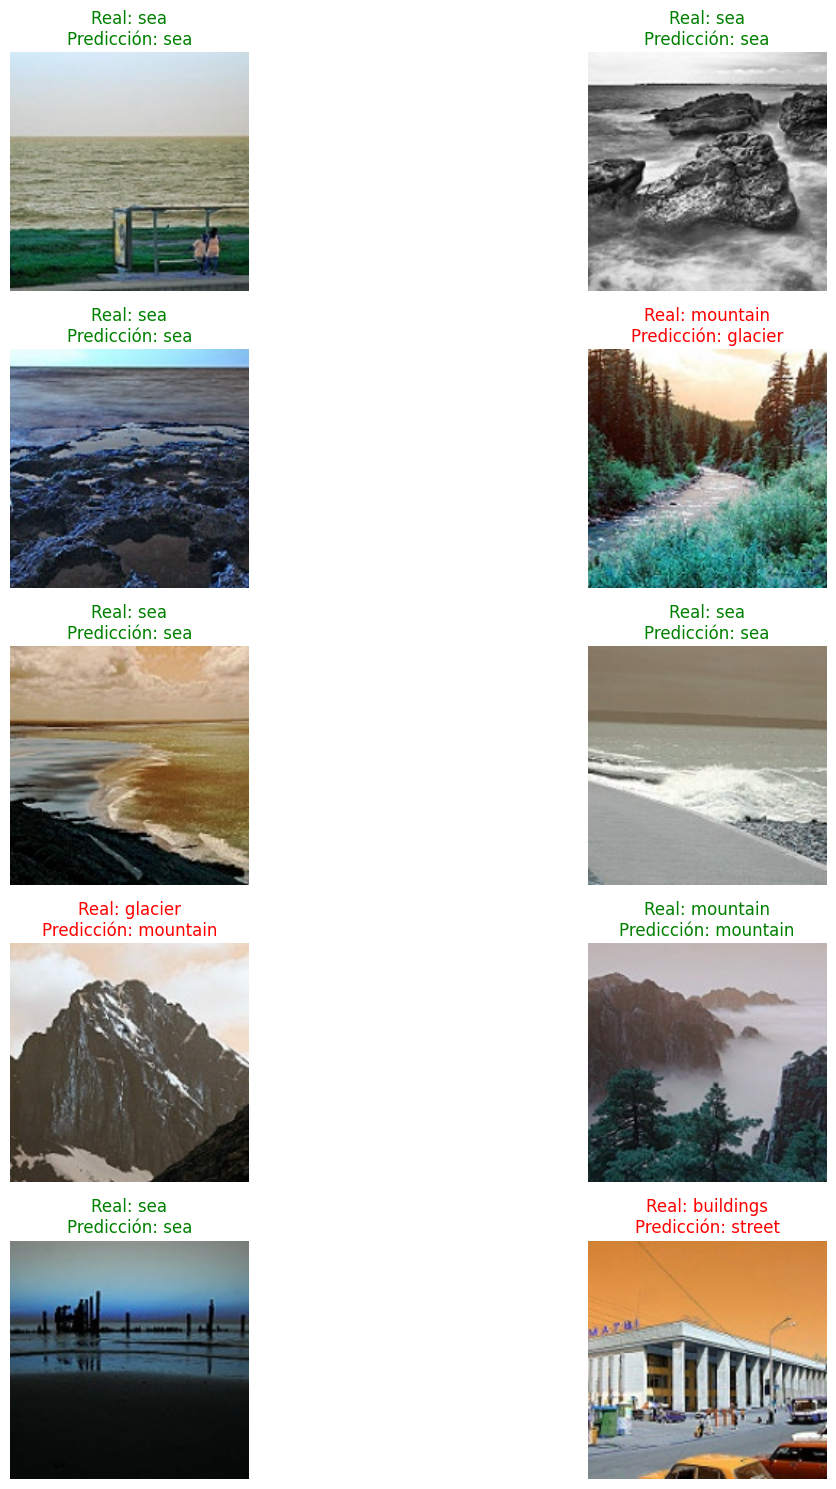

In [20]:

# Seleccionar 10 imágenes aleatorias
num_images_to_show = 10
indices = np.random.choice(len(X_test), num_images_to_show, replace=False)

# Obtener predicciones
y_pred = np.argmax(model.predict(X_test), axis=1)

# Graficar imágenes con predicciones
plt.figure(figsize=(15, 15))
for i, img_idx in enumerate(indices):
    plt.subplot(5, 2, i + 1)
    plt.imshow(X_test[img_idx].astype("uint8"))
    plt.axis("off")

    # Obtener la etiqueta real y la predicción
    real_label = class_mapping[y_test[img_idx]]
    predicted_label = class_mapping[y_pred[img_idx]]

    # Definir color según si la predicción fue correcta
    color = "green" if real_label == predicted_label else "red"

    plt.title(f"Real: {real_label}\nPredicción: {predicted_label}", color=color, fontsize=12)

plt.tight_layout()
plt.show()
